### The VC dimension

The VC dimension of a family of functions $f(x, \Theta)$ is the size of the largest set that can be shattered by $f(x, \Theta)$. In this notebook we show some simple examples in 1D.

The first cell includes some necesary imports, sets the inline mode for matplotlib plots and initializes the seed for random number generation.

In [ ]:
%matplotlib inline
import numpy as np
import numpy.matlib as matl
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
np.random.seed(19)

The next 4 cells define functions to plot the models we will work with. We will consider always two classes (-1 and 1), class -1 is plotted in red, class 1 is plotted in blue.

In [ ]:
def plotModel(x,clase,a,b,c,type):
    y = np.zeros_like(x)
    x_min = 0.0
    x_max = 5.5 
    hx = (x_max - x_min)/100.
    y_min = -1.0 
    y_max = 1.1
    hy = 1.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))
    
    if type == "linear":
        z = a*xx+b
    elif type == "square":
        z = a*xx*xx+b*xx+c
    elif type == "sine":
        z = np.sin(a*xx)
    else:
        z = a*xx+b
        
    m1 = np.abs(z.max())
    m2 = np.abs(z.min())
    m = np.max([m1,m2])
    v = np.linspace(-m, m, 10, endpoint=True)
    
    plt.figure(figsize=(12,2))
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    plt.contourf(xx, yy, z, v, cmap=cm, alpha=.8)
    plt.contour(xx, yy, z, [0], linewidths=[2], colors=['k'])

    plt.scatter(x[clase==-1], y[clase==-1], c='#FF0000', s=200)
    plt.scatter(x[clase==1], y[clase==1], c='#0000FF', s=200)
    plt.gca().set_xlim(xx.min(), xx.max())
    plt.gca().set_ylim(yy.min(), yy.max())
    plt.grid(True)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([0,5,-1,1])
    plt.title(type)

In [ ]:
def plotModelLinear(x,clase,a,b):
    plotModel(x,clase,a,b,0,"linear")

In [ ]:
def plotModelSquare(x,clase,a,b,c):
    plotModel(x,clase,a,b,c,"square")

In [ ]:
def plotModelSine(x,clase,a):
    plotModel(x,clase,a,0,0,"sine")

The following cell creates some data in 1D.

In [ ]:
x = np.array([1,2,3])
clase = np.array([-1, 1, -1])

#### Linear Model:

The linear model uses the classification function $f(x) = ax + b$. To find the boundary we can make $f(x) = 0$ to obtain:

$$
x_{0} = \frac{-b}{a}
$$

This boundary splits the $x$ axis into two regions: 

- $x < x_{0}$, of class given by $-\mathop{\mathrm{sign}}(a)$
- $x \geq x_{0}$, of class given by $\mathop{\mathrm{sign}}(a)$ 

In the following example we have $a = -1$ and $b = 2.5$. So the boundary is established at $x_{0} = -b/a = 2.5$ and the positive class (blue) is on the left.

Try to find values of $a$ and $b$ for the class assignments [-1, -1, 1] and [1, 1, 1]. Is it possible to solve for the class assignments [1, -1, 1]?

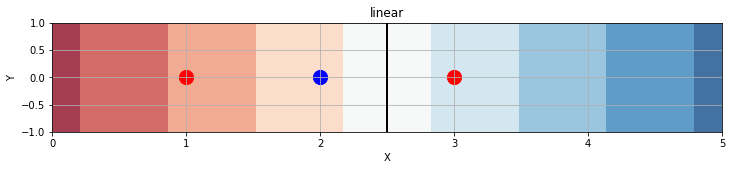

In [ ]:
a = 1.0
b = -2.5
plotModelLinear(x,clase,a,b)

#### Quadratic Model:

The quadratic model (square) uses the classification function $f(x) = ax^{2} + bx +c$. To find the boundary we can make $f(x) = 0$ to obtain:

$$
x_{0} = \frac{-b \pm \sqrt{b^{2} - 4ac}}{2a}
$$

We can consider the following cases:

**Case 1:** When $b^{2} - 4ac < 0$ there are no real solutions for $x_{0}$, so all the points belong to the same class. This class is -1 when $a<0$ and 1 when $a \geq 0$. Check for example the cases $a = 1$, $b=0$, $c=1$ or $a = -1$, $b=0$, $c=-1$.

**Case 2:** When $b^{2} - 4ac = 0$ there is just one real solution for $x_{0}$, at $x_{0} = -b/2a$. All the points (maybe with the exception $x=x_{0}$ belong to the same class. As before, this class is -1 when $a<0$ and 1 when $a \geq 0$. When $x=x_{0}$ we have $f(x) = 0$ and the class at this point will be usually 1. Check for example the cases $a = 1$, $b=-4$, $c=4$ or $a = -1$, $b=4$, $c=-4$.

**Case 3:** When $b^{2} - 4ac > 0$ there are two real solutions for $x_{0}$, that split the $x$ axis into 3 regions:

- Class 1 in the middle and class -1 in both sides when $a < 0$.
- Class -1 in the middle and class 1 in both sides when $a > 0$.

Consider for example the cases $a = 1$, $b=-3$, $c=0.5$ or $a = -1$, $b=3$, $c=-0.5$.


Try to find values of $a$, $b$ and $c$ for the class assignments [-1, -1, 1] and [1, 1, 1]. Is it possible to solve for the class assignments [1, -1, 1]?

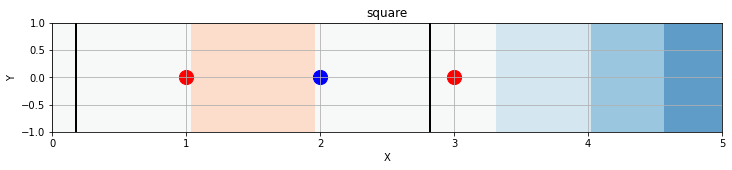

In [ ]:
plotModelSquare(x,clase,1.0,-3.0,0.5)

#### Sinusoidal Model:

The sinusoidal model (sine) uses the classification function $f(x) = \sin(ax)$. To find the boundary we can make $f(x) = 0$ to obtain:

$$
x_{0} = \frac{n \pi}{a}
$$

where $n$ is any integer number. This boundary splits the $x$ axis into an infinite number of regions of alternating classes 1, -1, 1, -1,... 

In the following example we have $a = 1$ and so the boundary is set at multiples of $\pi$. 

Try to find the value of $a$ for the class assignments [-1, -1, 1] and [1, 1, 1]. Is it possible to solve for the class assignments [1, -1, 1]?

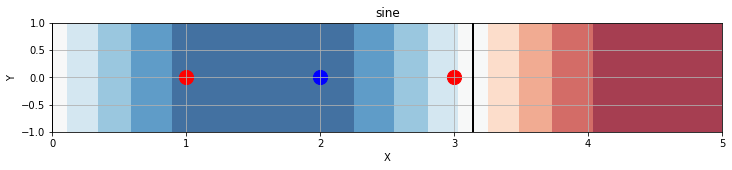

In [ ]:
a = 1
plotModelSine(x,clase,a)

#### Exercise 1:

1. Can all the models solve all the problems?
2. Which model would you say is the most complex? Why?
3. How would you measure the complexity of any other model?

#### Exercise 2:

1. Which is the VC dimension of the linear model?
2. Which is the VC dimension of the square model?
3. Which is the VC dimension of the sinusoidal model?